In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

**GRADIENT DESCENT CLASS**

In [2]:
#created a class GradientDescent which has attributes number of iterations(k),learning rate(lr), weights(weight) and bias(bias)

class GradientDescent:
  def __init__(self,no_of_iters,learning_rate):
    self.k=no_of_iters
    self.lr=learning_rate
    self.weight=None
    self.bias=None


  #activation function is sigmoid function
  def sigmoid_fn(self,x):
    y=1/(1+torch.exp(-x))
    return y

  #loss formulation
  #loss function is (y_predicted-y)**4
  def loss_fn(self,ypred,y):
    return (ypred-y)**4

    
  #Gradient computation
  #gradient_loss returns d(sigmoid_fn(ypred)/d(bias) where ypred=w1^Tx+b1
  #torch.exp(-x)/(1+torch.exp(-x))**2 = d(sigmoid(x))/dx
  def gradient_loss(self,ypred,y):
    y1=self.sigmoid_fn(ypred)
    y2=torch.exp(-ypred)/(1+torch.exp(-ypred))**2
    return 4*y2*(y1-y)**3

  

  # train_grad_descent updates weights and bias
  def train_grad_descent(self,X,y):
    self.weight= torch.zeros(X.shape[1])
    self.bias=0
    for j in range(self.k):
      for i in range(X.shape[0]):
          yp=X[i].dot(self.weight) + self.bias
          y1=self.sigmoid_fn(yp)
          #update weight and bias
          self.weight= self.weight- self.lr*self.gradient_loss(yp,y[i])*X[i]
          self.bias= self.bias- self.gradient_loss(yp,y[i])*self.lr
          

**DATASET CREATION**

In [3]:
#dataset creation

D1=torch.normal(0.0, 1.0,size=[500,2])
D2=torch.normal(5.0, 1.0,size=[500,2])
X=torch.empty(1000,D1.size(1)).fill_(1.0)
X[::2,:2] = D1
X[1::2,:2] = D2
print(X.shape)

y=torch.empty(1000,)
y[::2] = 1.0
y[1::2] = 0.0
print(y.shape)

torch.Size([1000, 2])
torch.Size([1000])


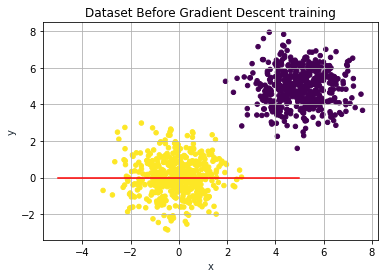

In [4]:
#plot of dataset with classifier before gradient descent

x1 = np.linspace(-5,5,100)
y1 = [0]*x1

plt.plot(x1, y1, '-r')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.title('Dataset Before Gradient Descent training')


plt.scatter(X[:, 0], X[:, 1], c=y, s=20)
plt.grid()
plt.show()

In [5]:
#creating GradientDescent (class) object and implementing Gradient Descent

p=GradientDescent(30,0.01)

p.train_grad_descent(X,y)


In [6]:
#print weights and bias
print(p.weight)
print(p.bias)

tensor([-0.4610, -0.3787])
tensor(1.8383)


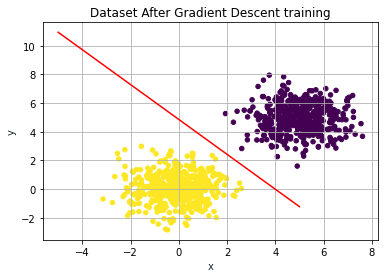

In [7]:
#plot of dataset with classifier after gradient descent

x1 = np.linspace(-5,5,100)
y1 = (-p.weight[0]/p.weight[1])*x1 - (p.bias)/p.weight[1]

plt.plot(x1, y1, '-r')
plt.title('Dataset After Gradient Descent training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')

plt.scatter(X[:, 0], X[:, 1], c=y, s=20)

plt.grid()
plt.show()